# Exploratory analysis

A brief exploratory analysis example. 

## Library and color scale

In [1]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myExploratory.R")

loadlibrary("MASS")
loadlibrary("gclus")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")
loadlibrary("GGally")
loadlibrary("reshape")
loadlibrary("dplyr")
loadlibrary("WVPlots")
loadlibrary("aplpack")

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]
options(repr.plot.width=4, repr.plot.height=3)

## Loading iris and wine datasets
The exploratory analysis is done using iris dataset.


In [2]:
data(iris)
exp_table(t(sapply(iris, class)))
exp_table(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
numeric,numeric,numeric,numeric,factor


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### Data Summary
A preliminary analysis using $Sepal.Length$ attribute. 

In [3]:
exp_table(t(summary(iris$Sepal.Length)), c("Statistics", "Freq") , proj=1)
exp_table(t(table(iris$Sepal.Length)), c("Value", "Freq") , proj=1)

Statistics,Freq
Min.,4.300000
1st Qu.,5.100000
Median,5.800000
Mean,5.843333
3rd Qu.,6.400000
Max.,7.900000


Value,Freq
4.3,1
4.4,3
4.5,1
4.6,4
4.7,2
4.8,5


## Histogram analysis

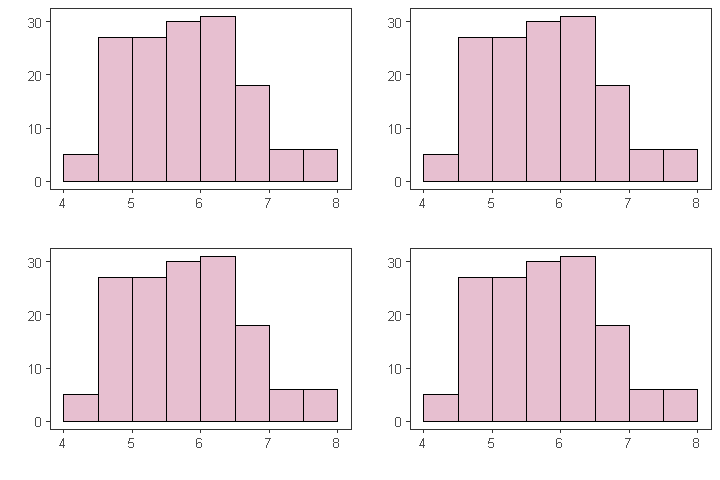

In [4]:
grfA <- plot.hist(iris %>% select(variable="Sepal.Length", value=Sepal.Length), color=mycolors[1])
grfB <- plot.hist(iris %>% select(variable="Sepal.Width", value=Sepal.Length), color=mycolors[1])
grfC <- plot.hist(iris %>% select(variable="Petal.Length", value=Sepal.Length), color=mycolors[1])
grfD <- plot.hist(iris %>% select(variable="Petal.Width", value=Sepal.Length), color=mycolors[1])

options(repr.plot.width=6, repr.plot.height=4)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
options(repr.plot.width=4, repr.plot.height=3)

## Density distribution

Using Species as id variables


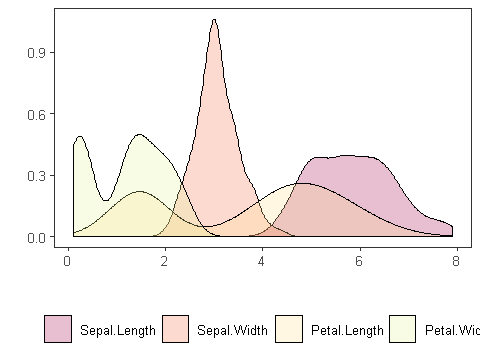

In [5]:
data <- melt(iris)
grfA <- plot.density(data, colors=mycolors[1:4])
plot(grfA)

## Density distribution colored by classifier

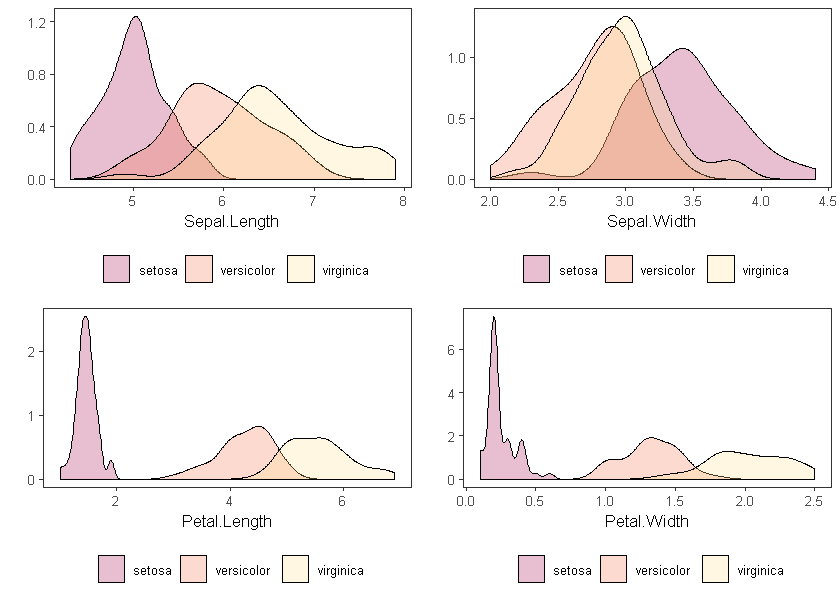

In [6]:
grfA <- plot.density(iris %>% select(variable=Species, value=Sepal.Length), label_x = "Sepal.Length", color=mycolors[c(1:3)])
grfB <- plot.density(iris %>% select(variable=Species, value=Sepal.Width), label_x = "Sepal.Width", color=mycolors[c(1:3)])
grfC <- plot.density(iris %>% select(variable=Species, value=Petal.Length), label_x = "Petal.Length", color=mycolors[c(1:3)])
grfD <- plot.density(iris %>% select(variable=Species, value=Petal.Width), label_x = "Petal.Width", color=mycolors[c(1:3)])

options(repr.plot.width=7, repr.plot.height=5)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
options(repr.plot.width=4, repr.plot.height=3)


## Box-plot analysis

Using Species as id variables


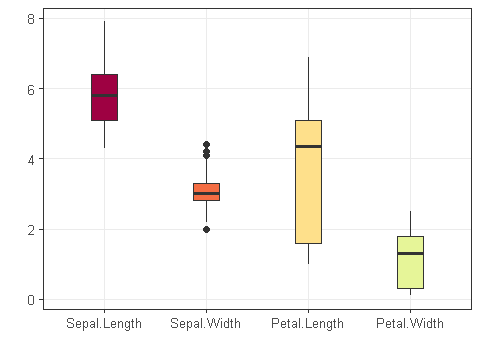

In [7]:
data <- melt(iris)
grfA <- plot.boxplot(data, colors=mycolors[1:4])
plot(grfA)

## Box-plot analysis grouped by classifier

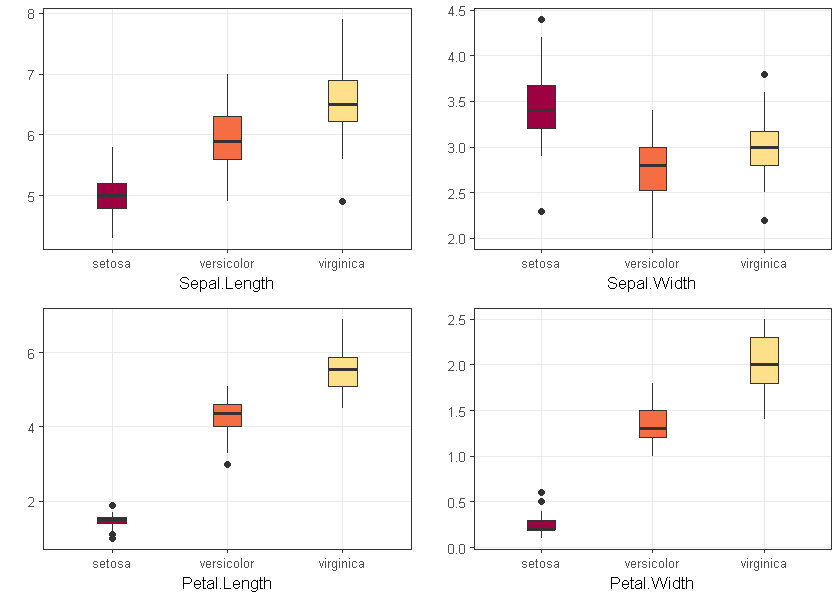

In [8]:
grfA <- plot.boxplot(iris %>% select(variable=Species, value=Sepal.Length), label_x = "Sepal.Length", color=mycolors[c(1:3)])
grfB <- plot.boxplot(iris %>% select(variable=Species, value=Sepal.Width), label_x = "Sepal.Width", color=mycolors[c(1:3)])
grfC <- plot.boxplot(iris %>% select(variable=Species, value=Petal.Length), label_x = "Petal.Length", color=mycolors[c(1:3)])
grfD <- plot.boxplot(iris %>% select(variable=Species, value=Petal.Width), label_x = "Petal.Width", color=mycolors[c(1:3)])

options(repr.plot.width=7, repr.plot.height=5)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
options(repr.plot.width=4, repr.plot.height=3)

## Checking for normal distribution

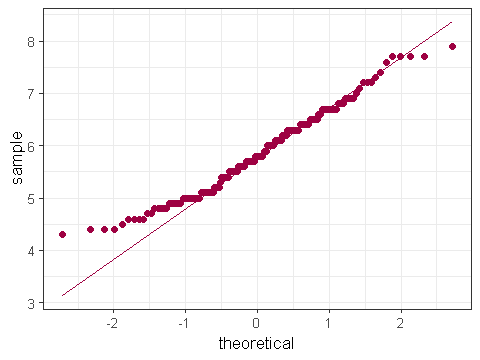

In [40]:
ggplot(iris, aes(sample = Sepal.Length)) +
  stat_qq(color=mycolors[1]) + theme_bw(base_size = 10) +
  stat_qq_line(color=mycolors[1])

## Correlation matrix

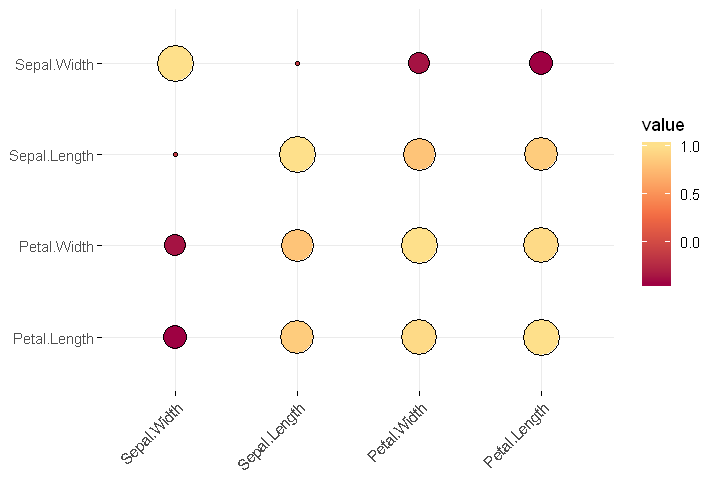

In [15]:
cor_mat <- cor(iris[1:4])
cor_mat <- melt(cor_mat)
colnames(cor_mat) <- c("x", "variable", "value")
cor_mat$variable <- factor(cor_mat$variable, levels=sort(colnames(iris[1:4])))
cor_mat$x <- factor(cor_mat$x, levels=sort(colnames(iris[1:4]),decreasing=TRUE))
cor_mat$radius <- abs(cor_mat$value)

options(repr.plot.width=6, repr.plot.height=4)

grf <- plot_ballon(cor_mat, color = mycolors[1:3]) 
plot(grf)

options(repr.plot.width=4, repr.plot.height=3)

## Parallel coordinates

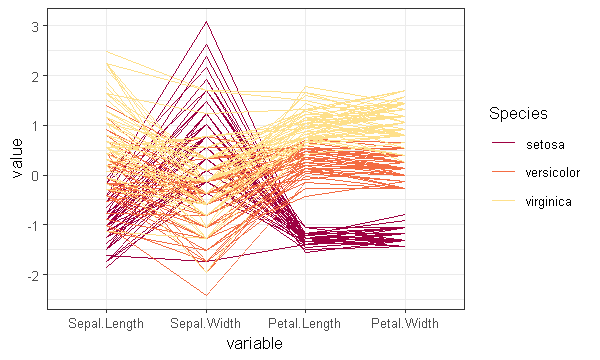

In [84]:
options(repr.plot.width=5, repr.plot.height=3)

p <- ggparcoord(data = iris, columns = c(1:4), group=5) + theme_bw(base_size = 10) + scale_color_manual(values=mycolors[1:3])
plot(p)

options(repr.plot.width=4, repr.plot.height=3)

## Matrix dispersion

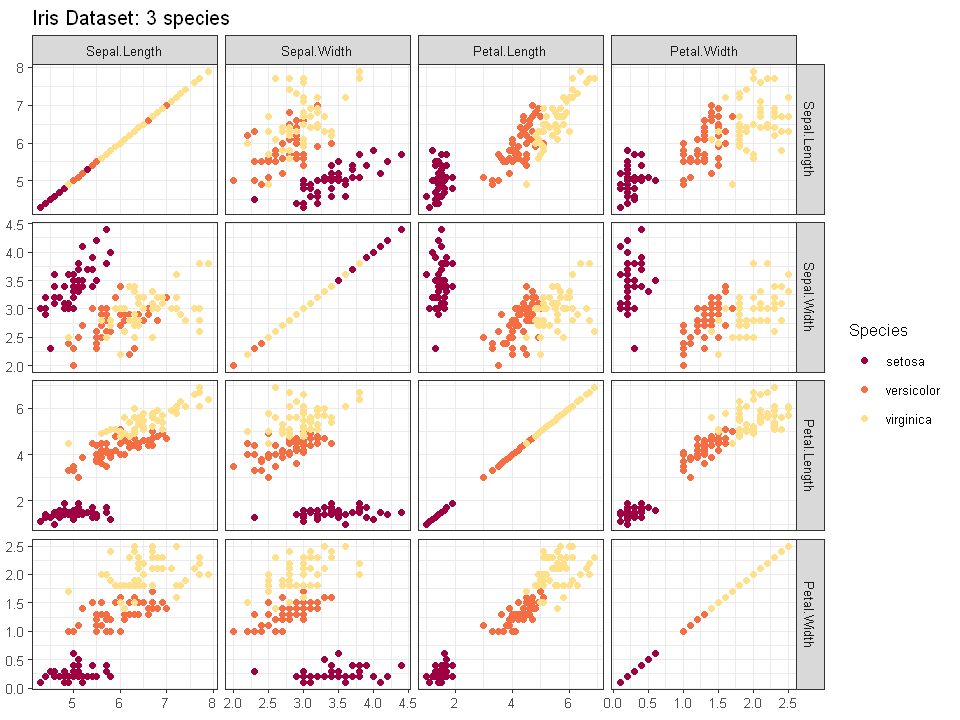

In [85]:
options(repr.plot.width=8, repr.plot.height=6)

grf <- PairPlot(iris, 
                colnames(iris)[1:4], 
                "Iris Dataset: 3 species", 
                group_var = "Species", palette=NULL) + theme_bw(base_size = 10) + scale_color_manual(values=mycolors[1:3])
plot(grf)

options(repr.plot.width=4, repr.plot.height=3)

## Advanced matrix dispersion

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


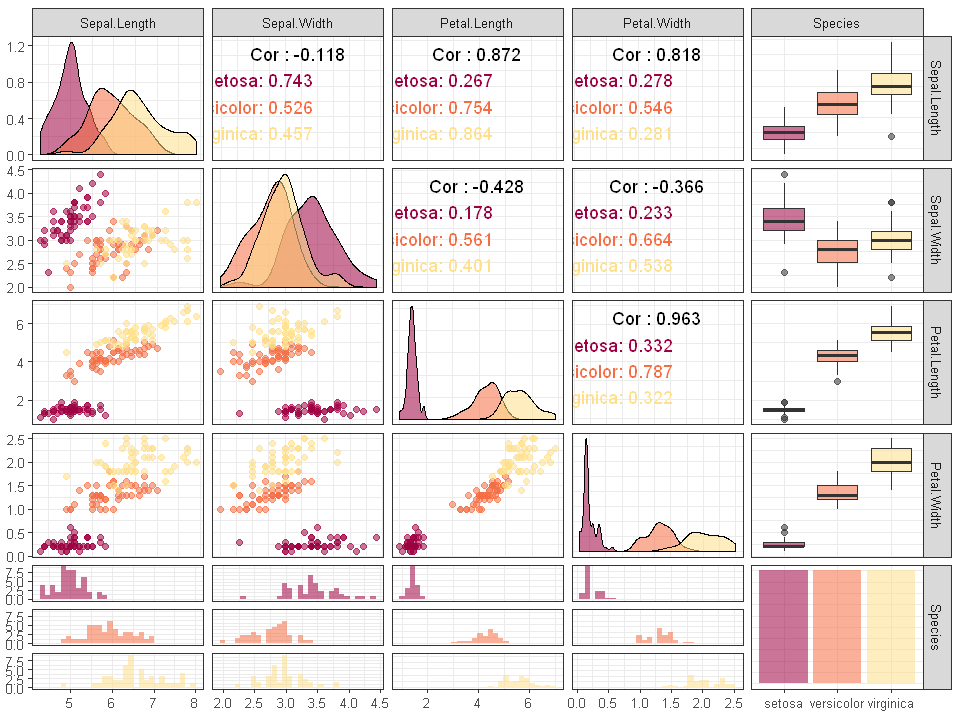

In [86]:
options(repr.plot.width=8, repr.plot.height=6)
grf <- ggpairs(iris[,], aes(colour = Species, alpha = 0.4)) + theme_bw(base_size = 10) 

for(i in 1:grf$nrow) {
  for(j in 1:grf$ncol){
    grf[i,j] <- grf[i,j] + 
      scale_fill_manual(values=mycolors[1:3]) +
      scale_color_manual(values=mycolors[1:3])  
  }
}

grf

options(repr.plot.width=4, repr.plot.height=3)

## Chernoff Faces

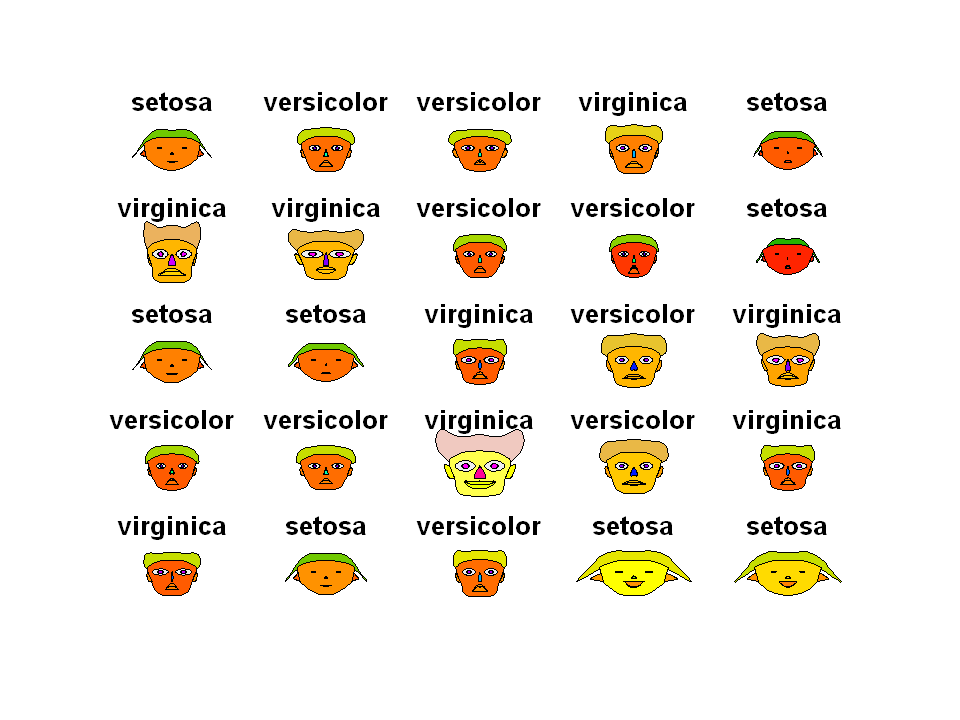

In [87]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(isample$Species)
isample$Species <- NULL

options(repr.plot.width=8, repr.plot.height=6)
faces(isample, labels = labels, print.info=F)
options(repr.plot.width=4, repr.plot.height=3)